# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [88]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path, index_col='Country')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 19)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [89]:
df.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [90]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, Afghanistan  to Zimbabwe 
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              227 non-null    object 
 1   Population                          227 non-null    int64  
 2   Area (sq. mi.)                      227 non-null    int64  
 3   Pop. Density (per sq. mi.)          227 non-null    object 
 4   Coastline (coast/area ratio)        227 non-null    object 
 5   Net migration                       224 non-null    object 
 6   Infant mortality (per 1000 births)  224 non-null    object 
 7   GDP ($ per capita)                  226 non-null    float64
 8   Literacy (%)                        209 non-null    object 
 9   Phones (per 1000)                   223 non-null    object 
 10  Arable (%)                          225 non-null    object 
 11  Crops (%)                        

In [91]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [92]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Some features need to change its dtype          <br>
2- Fill NaNs          <br>
3- Region feature should be dummied          <br>

In [93]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**Some features need to change its dtype**

In [94]:
#solution 
dtype_columns = df_copy.select_dtypes(include='object').columns.to_list()
dtype_columns = dtype_columns[1:]

for column in dtype_columns:
    df_copy[column] = df_copy[column].str.replace(',','.')
    df_copy[column] = df_copy[column].astype(float)

In [95]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, Afghanistan  to Zimbabwe 
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              227 non-null    object 
 1   Population                          227 non-null    int64  
 2   Area (sq. mi.)                      227 non-null    int64  
 3   Pop. Density (per sq. mi.)          227 non-null    float64
 4   Coastline (coast/area ratio)        227 non-null    float64
 5   Net migration                       224 non-null    float64
 6   Infant mortality (per 1000 births)  224 non-null    float64
 7   GDP ($ per capita)                  226 non-null    float64
 8   Literacy (%)                        209 non-null    float64
 9   Phones (per 1000)                   223 non-null    float64
 10  Arable (%)                          225 non-null    float64
 11  Crops (%)                        

**Fill NaNs**

In [96]:
#solution 
df_copy = df_copy.fillna(df_copy.median(), axis=0)

In [97]:
#test 
df_copy.isnull().sum()

Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Region feature should be factorized**

In [98]:
#solution 
region_map = dict(zip(df_copy['Region'].value_counts().keys(), list(range(len(df_copy['Region'].value_counts().keys())))))
df_copy['Region'] = df_copy['Region'].map(region_map)

In [99]:
#test 
df_copy['Region'].value_counts().

SyntaxError: invalid syntax (<ipython-input-99-f42bee9aea36>, line 2)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [103]:
from sklearn import preprocessing

In [104]:
mms = preprocessing.MinMaxScaler()
df_copy = mms.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy, columns=df.columns, index=df.index)
df_copy.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.2,0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,0.002897,0.195299,0.004341,0.814759,0.000000,0.904926,0.657559,0.494148,0.248307,0.356502
Albania,0.7,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,0.068573,0.339559,0.087214,0.617369,0.666667,0.180018,0.106740,0.301691,0.189616,0.579596
Algeria,0.8,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,0.075237,0.051844,0.004933,0.947953,0.000000,0.226750,0.084517,0.131339,0.654628,0.264574
American Samoa,0.4,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,0.250435,0.161005,0.295975,0.625019,0.333333,0.349217,0.035701,0.128739,0.284424,0.570628
Andorra,0.3,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,0.480008,0.035743,0.000000,0.966702,0.666667,0.032689,0.144262,0.128739,0.284424,0.570628


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

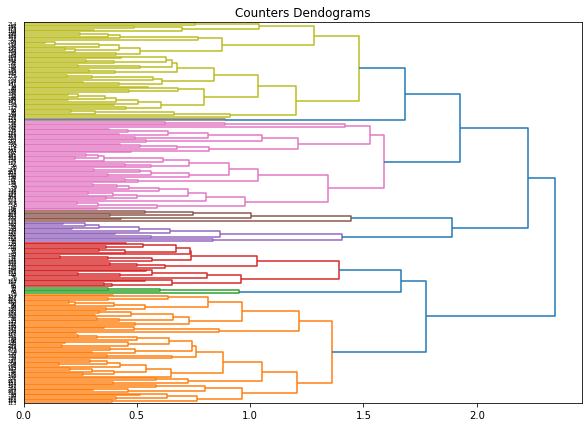

In [105]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method='complete',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [117]:
#training
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=8)
model.fit(df_copy)

pd.DataFrame({'Country':df.index, 'Cluster':model.labels_})

,Country,Cluster
0,Afghanistan,7
1,Albania,4
2,Algeria,3
3,American Samoa,0
4,Andorra,2
...,...,...
222,West Bank,0
223,Western Sahara,3
224,Yemen,3
225,Zambia,1


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 